# Partition similarity measures

In [21]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00


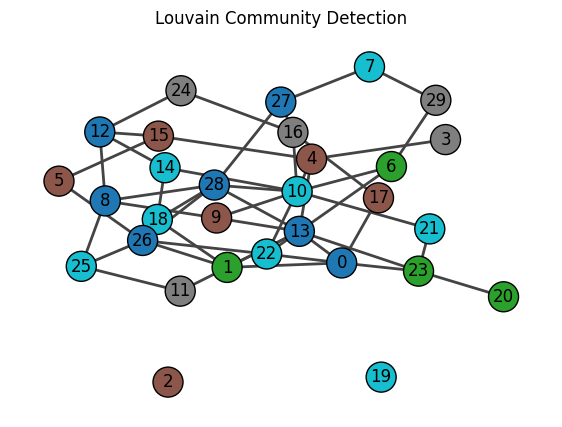

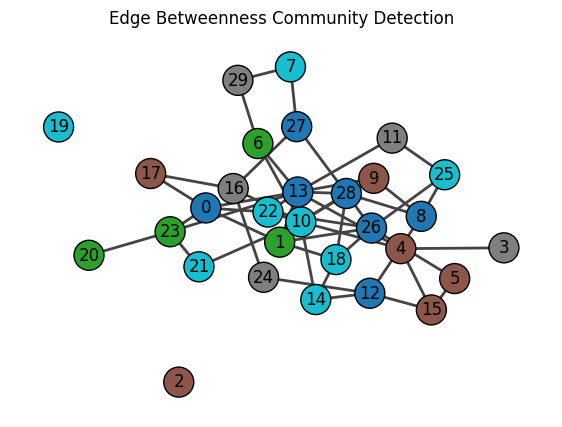

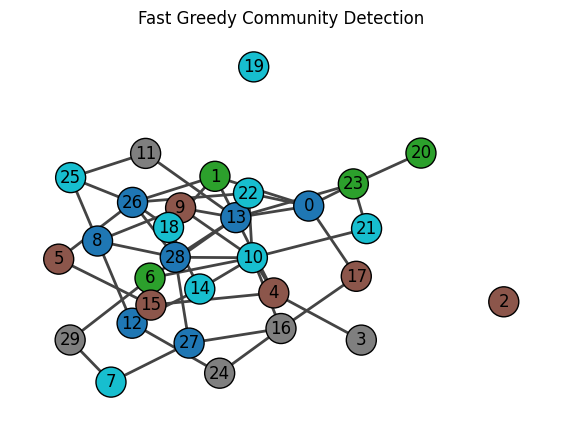


Partition Similarity Measures:
NMI (Louvain vs Edge Betweenness): 0.6583
NMI (Louvain vs Fast Greedy): 0.4898
VI (Louvain vs Edge Betweenness): 1.3527
VI (Louvain vs Fast Greedy): 1.7945
Rand Index (Louvain vs Edge Betweenness): 0.8230
Rand Index (Louvain vs Fast Greedy): 0.7701


In [28]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Generate a Random Graph
# ----------------------------
G = ig.Graph.Erdos_Renyi(n=30, m=50)  # 30 nodes, 50 edges
G.vs["label"] = [str(i) for i in range(G.vcount())]  # Assign labels

# ----------------------------
# 2. Apply Community Detection Methods
# ----------------------------
# Louvain Method
louvain_communities = G.community_multilevel()

# Edge Betweenness Method
edge_betweenness_communities = G.community_edge_betweenness().as_clustering()

# Fast Greedy Method
fast_greedy_communities = G.community_fastgreedy().as_clustering()

# Assign Color
def get_cluster_colors(communities):
    num_clusters = len(set(communities.membership))
    colors = plt.cm.get_cmap("tab10", num_clusters)  # Use 'tab10' colormap
    return [colors(i)[:3] for i in communities.membership]


# ----------------------------
# 3. Visualize Detected Communities
# ----------------------------
def plot_graph(graph, communities, title):
    color_map = communities.membership  # Assign colors to communities
    fig, ax = plt.subplots(figsize=(7, 5))
    ig.plot(graph, target=ax, vertex_color=node_colors, bbox=(300, 300), margin=50)
    plt.title(title)
    plt.show()

plot_graph(G, louvain_communities, "Louvain Community Detection")
plot_graph(G, edge_betweenness_communities, "Edge Betweenness Community Detection")
plot_graph(G, fast_greedy_communities, "Fast Greedy Community Detection")

# ----------------------------
# 4. Partition Similarity Measures
# ----------------------------
# Convert communities to membership lists
def get_membership(communities):
    return communities.membership

# Compute Similarity Measures
louvain_membership = get_membership(louvain_communities)
edge_betweenness_membership = get_membership(edge_betweenness_communities)
fast_greedy_membership = get_membership(fast_greedy_communities)

# Normalized Mutual Information (NMI)
nmi_eb_louvain = ig.compare_communities(louvain_membership, edge_betweenness_membership, method="nmi")
nmi_fg_louvain = ig.compare_communities(louvain_membership, fast_greedy_membership, method="nmi")

# Variation of Information (VI)
vi_eb_louvain = ig.compare_communities(louvain_membership, edge_betweenness_membership, method="vi")
vi_fg_louvain = ig.compare_communities(louvain_membership, fast_greedy_membership, method="vi")

# Rand Index (RI)
ri_eb_louvain = ig.compare_communities(louvain_membership, edge_betweenness_membership, method="rand")
ri_fg_louvain = ig.compare_communities(louvain_membership, fast_greedy_membership, method="rand")

# Print Results
print("\nPartition Similarity Measures:")
print(f"NMI (Louvain vs Edge Betweenness): {nmi_eb_louvain:.4f}")
print(f"NMI (Louvain vs Fast Greedy): {nmi_fg_louvain:.4f}")

print(f"VI (Louvain vs Edge Betweenness): {vi_eb_louvain:.4f}")
print(f"VI (Louvain vs Fast Greedy): {vi_fg_louvain:.4f}")

print(f"Rand Index (Louvain vs Edge Betweenness): {ri_eb_louvain:.4f}")
print(f"Rand Index (Louvain vs Fast Greedy): {ri_fg_louvain:.4f}")


# Consensus Clustering

In [29]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster

<ipython-input-30-87df1989c5b4>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


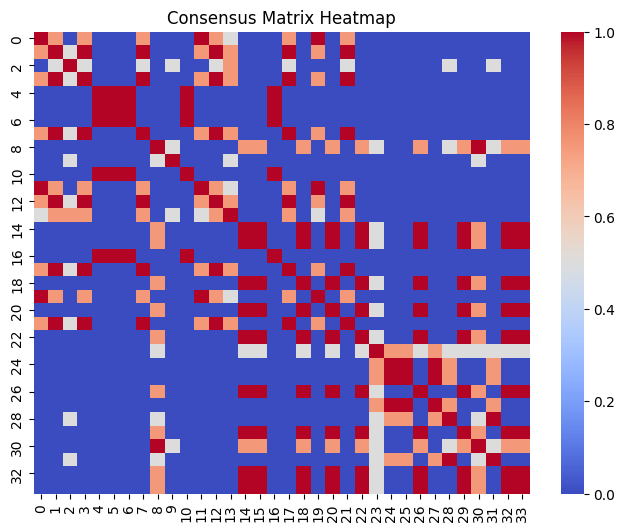

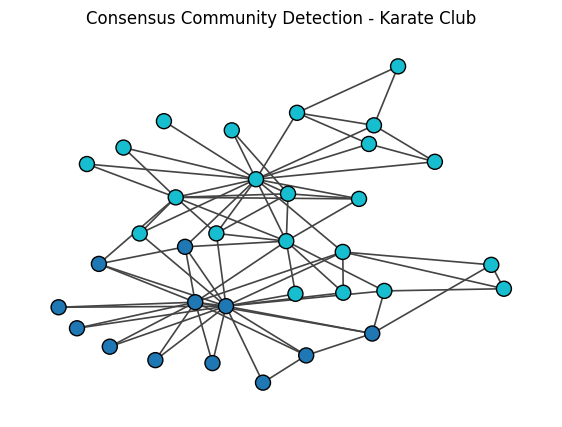

In [30]:
# Load Karate Club Graph
G = ig.Graph.Famous("Zachary")

# Apply Multiple Community Detection Methods
num_nodes = G.vcount()
nP = 4  # Number of partitions to consider
partitions = []

# 1. Louvain Method
partitions.append(G.community_multilevel())

# 2. Edge Betweenness (Girvan-Newman)
partitions.append(G.community_edge_betweenness().as_clustering())

# 3. Fast Greedy Method
partitions.append(G.community_fastgreedy().as_clustering())

# 4. Walktrap Method
partitions.append(G.community_walktrap().as_clustering())

# Consensus Matrix Initialization
consensus_matrix = np.zeros((num_nodes, num_nodes))

# Compute Consensus Matrix
for partition in partitions:
    membership = partition.membership
    for i in range(num_nodes):
        for j in range(num_nodes):
            if membership[i] == membership[j]:  # If nodes i and j are in the same community
                consensus_matrix[i, j] += 1

# Normalize by the number of partitions
consensus_matrix /= nP

# Apply a threshold to remove weak links (optional)
threshold = 0.5
consensus_matrix[consensus_matrix < threshold] = 0

# Apply Hierarchical Clustering to the Consensus Matrix
linkage_matrix = linkage(consensus_matrix, method="ward")
final_clusters = fcluster(linkage_matrix, t=2, criterion="maxclust")

# Assign Colors Based on Final Clustering
def get_cluster_colors(cluster_labels):
    unique_clusters = list(set(cluster_labels))
    colors = plt.cm.get_cmap("tab10", len(unique_clusters))
    return [colors(unique_clusters.index(label))[:3] for label in cluster_labels]

node_colors = get_cluster_colors(final_clusters)

# Plot Consensus Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(consensus_matrix, cmap="coolwarm", annot=False)
plt.title("Consensus Matrix Heatmap")
plt.show()

# Plot the Graph with Consensus Clustering
fig, ax = plt.subplots(figsize=(7, 5))
ig.plot(
    G,
    target=ax,
    vertex_color=node_colors,  # Apply consensus cluster colors
    vertex_size=15,
    edge_width=1.2,
    bbox=(300, 300),
    margin=50,
)
plt.title("Consensus Community Detection - Karate Club")
plt.show()

# Hierarchical Clustering

In [33]:
from scipy.cluster.hierarchy import dendrogram

<ipython-input-34-0572fa3452aa>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


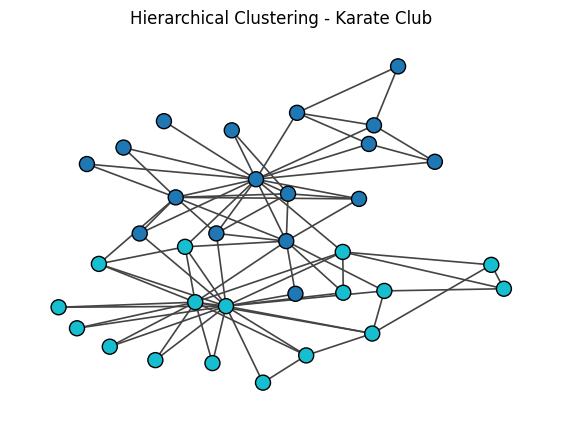

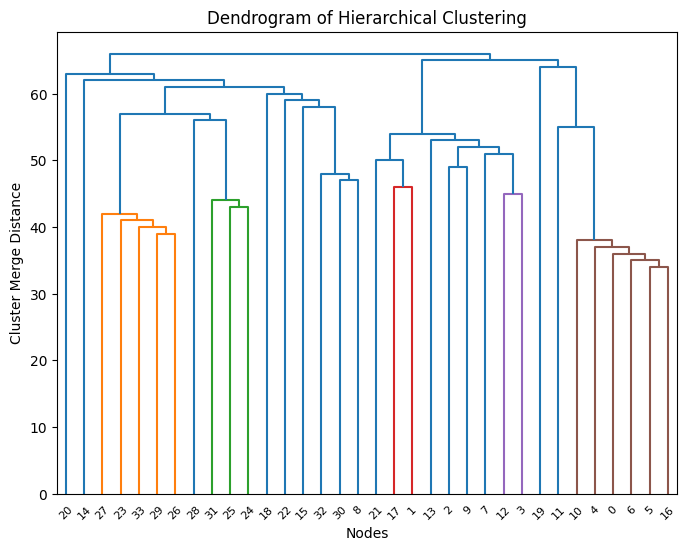

In [34]:
# Compute Hierarchical Clustering Using Fast-Greedy
dendrogram_structure = G.community_fastgreedy()

# Convert Dendrogram to Cluster Partitioning
num_clusters = 2  # Choose the number of final clusters
clusters = dendrogram_structure.as_clustering(num_clusters)

# Assign Colors to Clusters
def get_cluster_colors(membership):
    unique_clusters = list(set(membership))
    colors = plt.cm.get_cmap("tab10", len(unique_clusters))
    return [colors(unique_clusters.index(label))[:3] for label in membership]

node_colors = get_cluster_colors(clusters.membership)

# Plot the Graph with Cluster Colors
fig, ax = plt.subplots(figsize=(7, 5))
ig.plot(
    G,
    target=ax,
    vertex_color=node_colors,  # Apply cluster colors
    vertex_size=15,
    edge_width=1.2,
    bbox=(300, 300),
    margin=50,
)
plt.title("Hierarchical Clustering - Karate Club")
plt.show()

# Corrected Dendrogram Plot Function
def plot_dendrogram(dendrogram_structure):
    merges = dendrogram_structure.merges  # Get merge matrix
    num_nodes = len(merges) + 1  # Total nodes

    # Create linkage matrix in SciPy format
    linkage_matrix = np.column_stack((
        merges,  # Merges between nodes
        np.arange(num_nodes, num_nodes + len(merges)),  # Merge index
        np.ones(len(merges))  # Set uniform distances (not available in igraph)
    ))

    plt.figure(figsize=(8, 6))
    dendrogram(linkage_matrix, orientation="top", distance_sort="ascending", show_leaf_counts=True)
    plt.title("Dendrogram of Hierarchical Clustering")
    plt.xlabel("Nodes")
    plt.ylabel("Cluster Merge Distance")
    plt.show()

plot_dendrogram(dendrogram_structure)